In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [8]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [9]:
df["date_index"] = df["Date_month_year"] + " " + df["Time"]

In [13]:
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [14]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [15]:
df = df.set_index(df["date_index"])

In [16]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


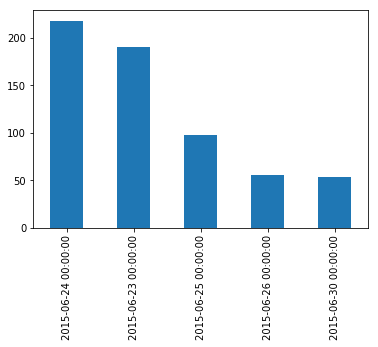

In [19]:
df["Date_month_year"].value_counts().head().plot(kind="bar")

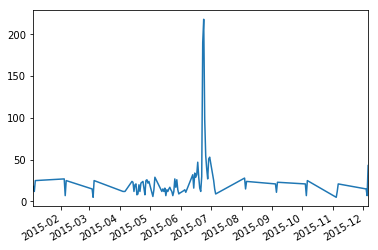

In [45]:
df["Date_month_year"].value_counts().plot();

(array([114.,  45.,  83., 417., 465., 822.,  67.,  55.,  53., 103.]),
 array([735602. , 735635.6, 735669.2, 735702.8, 735736.4, 735770. ,
        735803.6, 735837.2, 735870.8, 735904.4, 735938. ]),
 <a list of 10 Patch objects>)

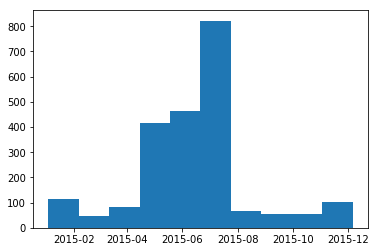

In [20]:
plt.hist(df["Date_month_year"])

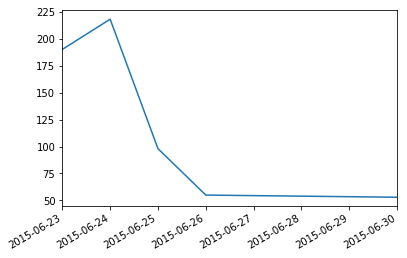

In [21]:
df["Date_month_year"].value_counts().head().plot()

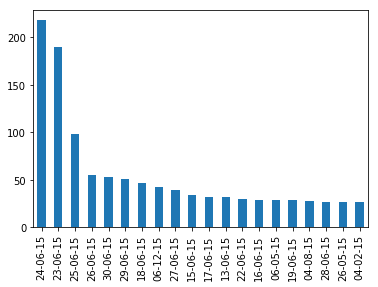

In [22]:
df["Date"].value_counts().head(20).plot(kind="bar")

In [46]:
f = df.groupby(pd.Grouper(freq="M")).size()

In [47]:
f.head()

date_index
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

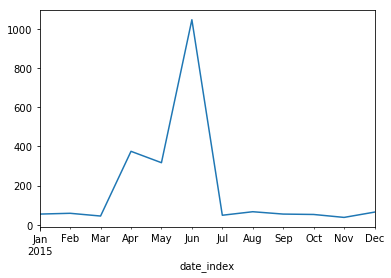

In [48]:
df.groupby(pd.Grouper(freq="M")).size().plot()

In [49]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [26]:
df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]

In [27]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed


In [28]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:5]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [29]:
Status_complaints = df.groupby(["State","newStatus"]).size().unstack().fillna(0)
Status_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


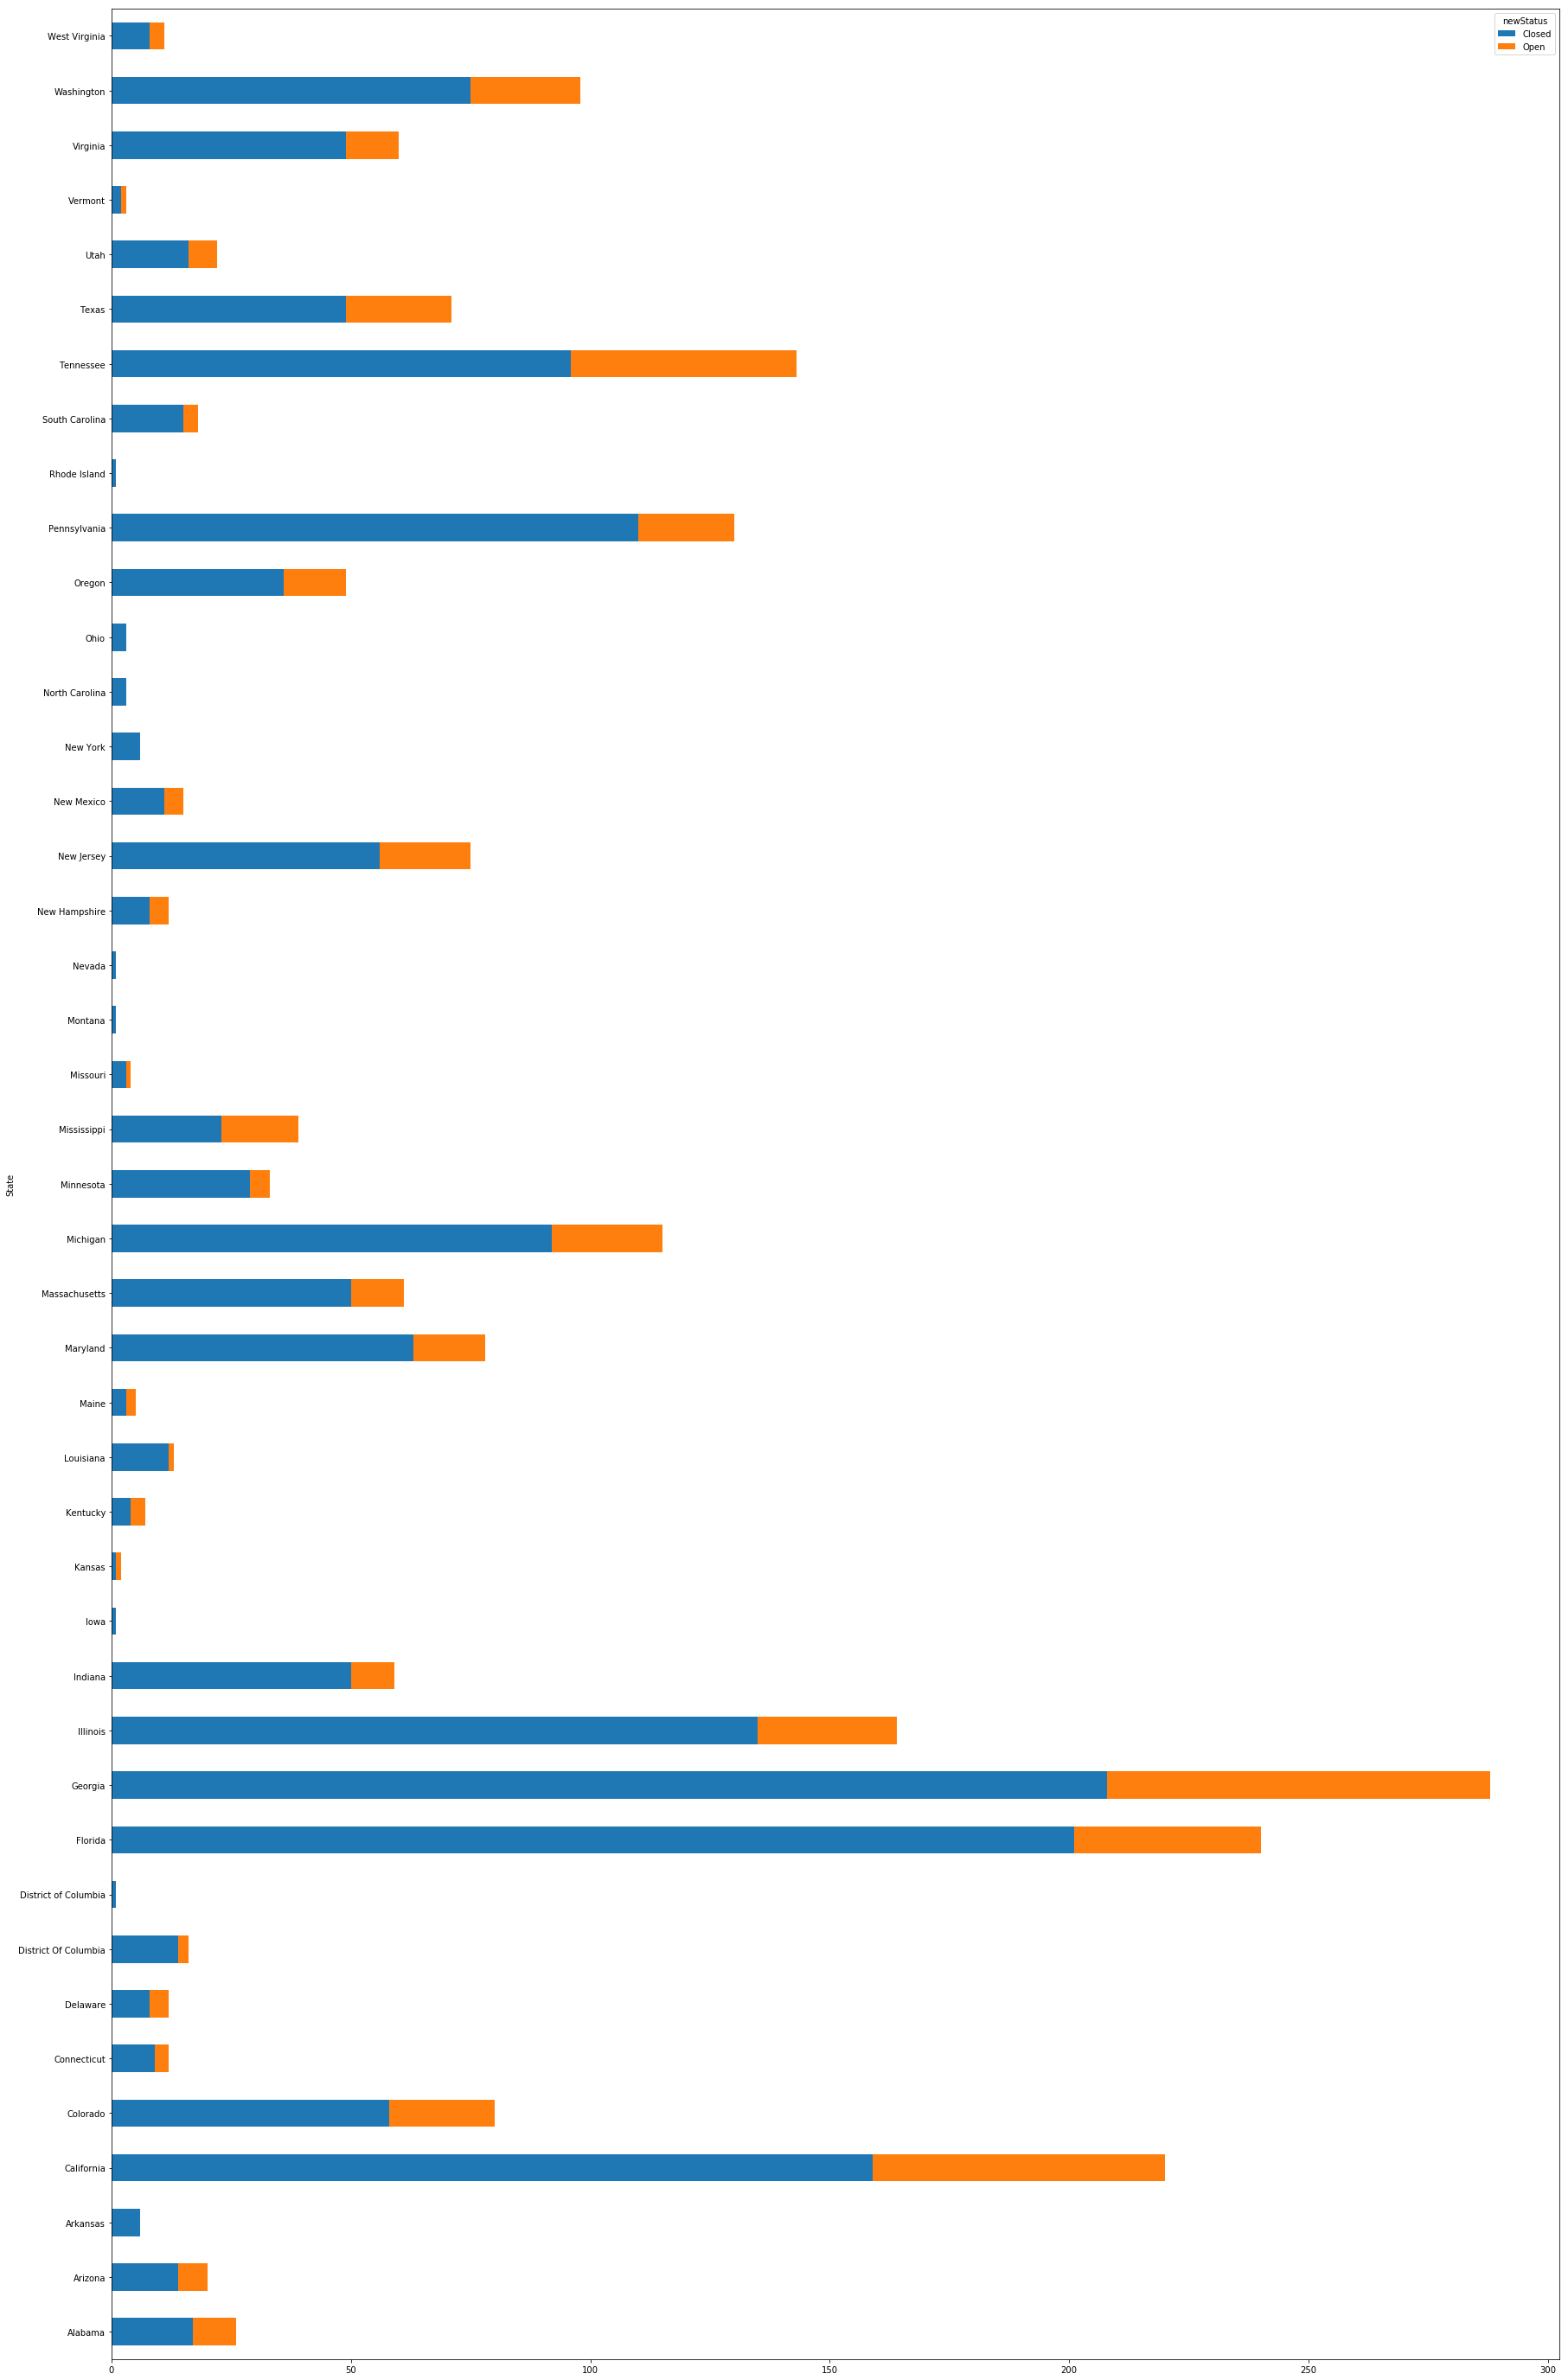

In [54]:
Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True)

In [30]:
from wordcloud import WordCloud, STOPWORDS

In [31]:
txt = df["Customer Complaint"].values

In [32]:
wc = WordCloud(width =200, height= 200, background_color = "white",stopwords= STOPWORDS).generate(str(txt))

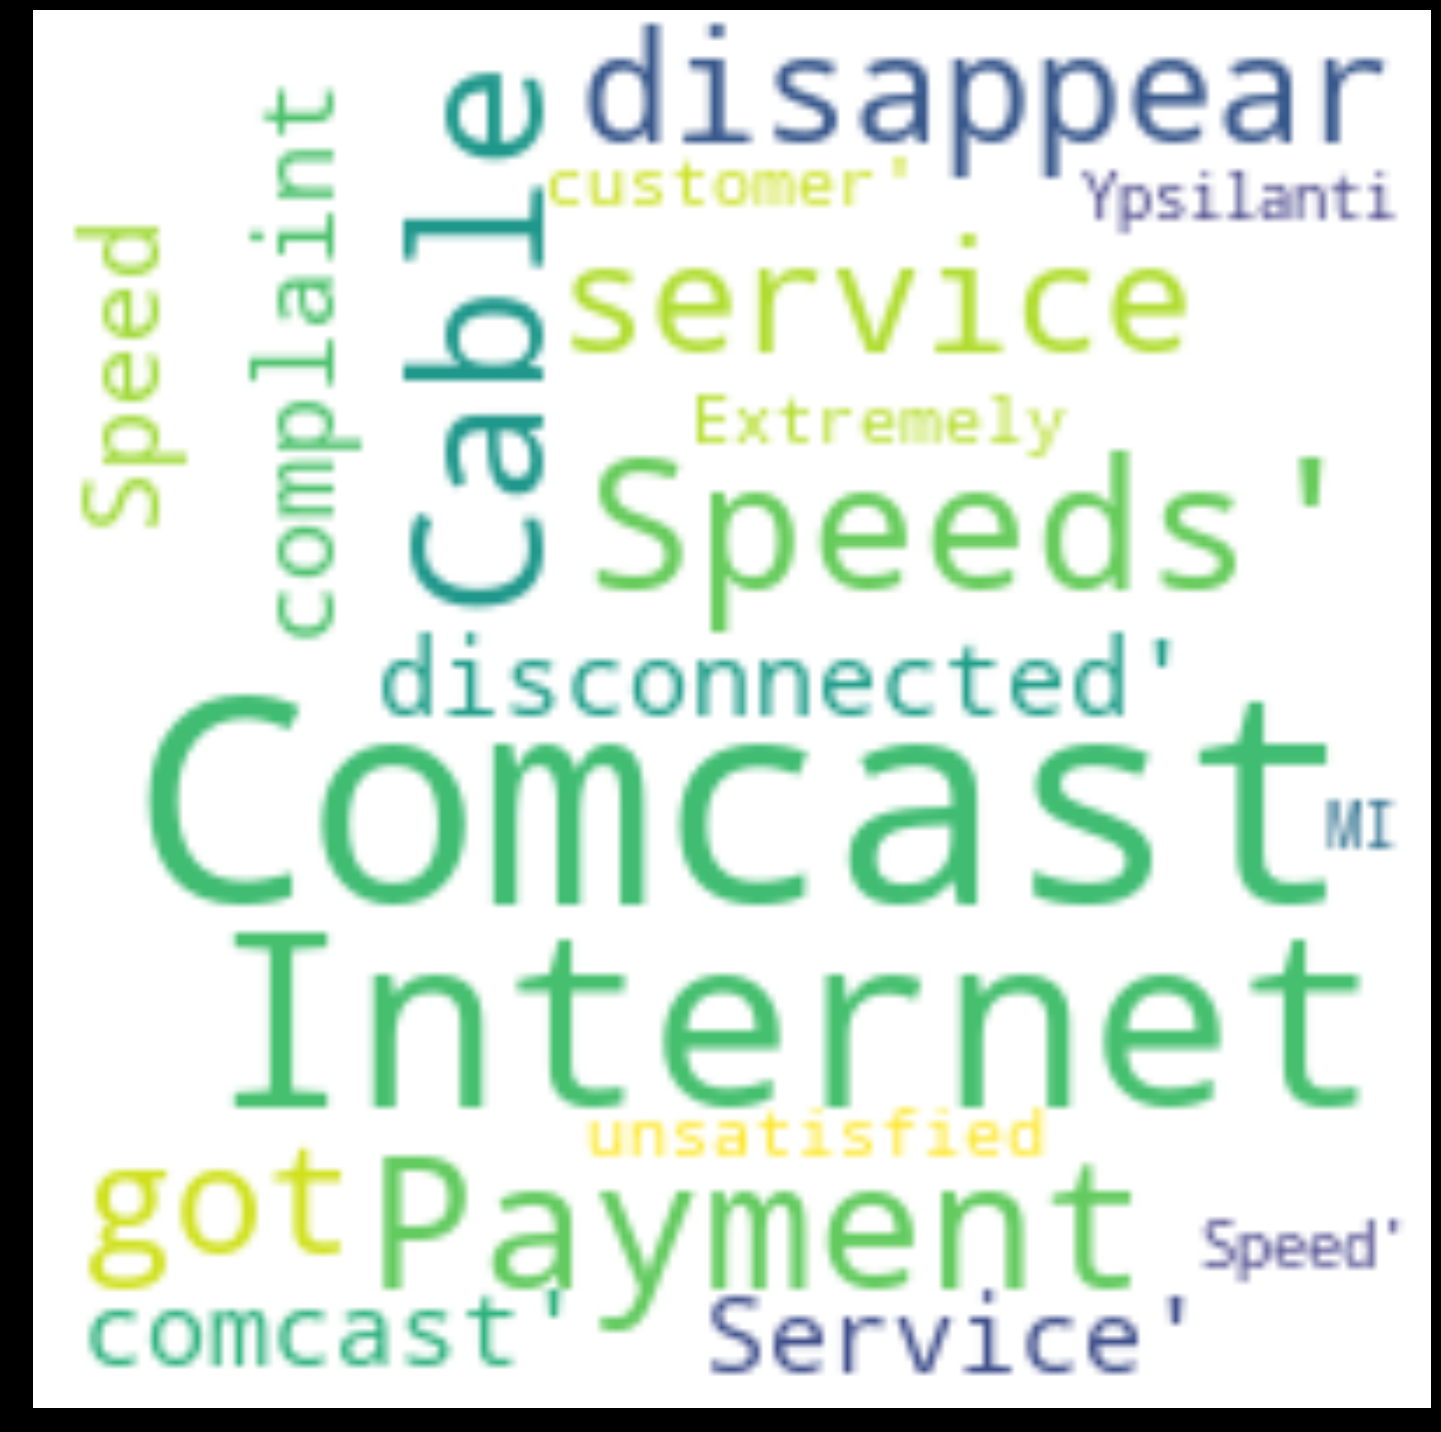

In [33]:
fig = plt.figure(figsize=(20,20), facecolor = 'k',edgecolor= 'b')
plt.imshow(wc, interpolation= "bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

In [55]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

In [56]:
df.groupby(["State","newStatus"]).size().unstack().fillna(0).max()

newStatus
Closed    208.0
Open       80.0
dtype: float64

In [57]:
!pip install wordcloud

In [58]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()


In [59]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [60]:
doc_complete = df["Customer Complaint"].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [61]:
import gensim
from gensim import corpora

In [62]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1416 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [63]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [64]:
from gensim.models import LdaModel

In [65]:
Num_Topic = 9
ldamodel = LdaModel(doc_term_matrix, num_topics= Num_Topic, id2word= dictionary, passes= 30)

In [66]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.144*"billing" + 0.084*"service" + 0.074*"practice" + 0.066*"unfair" + 0.053*"internet" + 0.050*"pricing" + 0.047*"poor" + 0.024*"outage" + 0.022*"monopolistic" + 0.019*"incorrect"')

(1, '0.069*"fee" + 0.037*"equipment" + 0.036*"comcast" + 0.029*"xfinitycomcast" + 0.026*"charge" + 0.024*"asking" + 0.019*"throttle" + 0.018*"bandwidth" + 0.018*"broadband" + 0.018*"day"')

(2, '0.106*"comcast" + 0.041*"service" + 0.026*"bill" + 0.025*"month" + 0.022*"sale" + 0.021*"deceptive" + 0.021*"access" + 0.020*"account" + 0.019*"charging" + 0.017*"without"')

(3, '0.087*"price" + 0.058*"false" + 0.045*"connection" + 0.040*"paying" + 0.035*"switch" + 0.024*"bait" + 0.024*"unreliable" + 0.022*"low" + 0.020*"home" + 0.019*"high"')

(4, '0.041*"comcast" + 0.040*"speed" + 0.029*"credit" + 0.024*"payment" + 0.023*"promised" + 0.023*"service" + 0.021*"bill" + 0.021*"charge" + 0.020*"charged" + 0.020*"slowing"')

(5, '0.275*"comcast" + 0.125*"service" + 0.078*"internet" + 0.063*"billing" + 0.047*"is

In [67]:
word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn =20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [68]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,billing,fee,comcast,price,comcast,comcast,internet,comcast,comcast
1,service,equipment,service,false,speed,service,speed,data,service
2,practice,comcast,bill,connection,credit,internet,slow,cap,internet
3,unfair,xfinitycomcast,month,paying,payment,billing,comcast,complaint,bill
4,internet,charge,sale,switch,promised,issue,connectivity,service,throttling
5,pricing,asking,deceptive,bait,service,customer,issue,internet,cable
6,poor,throttle,access,unreliable,bill,xfinity,business,usage,problem
7,outage,bandwidth,account,low,charge,charge,call,customer,without
8,monopolistic,broadband,charging,home,charged,fraudulent,advertised,charge,comcastxfinity
9,incorrect,day,without,high,slowing,failure,charge,help,cramming
